In [1]:
import numpy as np
import pandas as pd 

In [2]:
data = pd.read_csv("./archive/Placement_Data_Full_Class.csv")

In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
data.drop(["ssc_b","hsc_b","hsc_s","degree_t","salary"],axis=1,inplace=True)

In [5]:
data.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed


In [6]:
data.shape

(215, 10)

In [7]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
hsc_p             0
degree_p          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

# Preprocessing

# Encoding

In [8]:
data["gender"]=data["gender"].map({"M":0,"F":1})
data["workex"]=data["workex"].map({"No":0,"Yes":1})
data["status"]=data["status"].map({"Not Placed":0,"Placed":1})
data["specialisation"]=data["specialisation"].map({"Mkt&HR":0,"Mkt&Fin":1})

In [9]:
data.sample(5)

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
213,214,1,74.0,66.00,58.00,0,70.00,0,60.23,1
109,110,0,52.0,63.00,65.00,1,86.00,0,56.09,0
49,50,1,50.0,37.00,52.00,0,65.00,0,56.11,0
59,60,0,52.6,65.58,72.11,0,57.60,1,56.66,1
78,79,0,84.0,90.90,64.50,0,86.04,1,59.42,1


# Balance Dataset

In [10]:
data["status"].value_counts()

status
1    148
0     67
Name: count, dtype: int64

In [11]:
from sklearn.utils import resample

data_minority = data[data["status"]==0]
data_majority = data[data["status"]==1]

minority_resampled_data = resample(data_minority,
        replace=True,
        n_samples=len(data_majority),random_state=43)
balanced_data=pd.concat([data_majority,minority_resampled_data])

In [12]:
balanced_data["status"].value_counts()

status
1    148
0    148
Name: count, dtype: int64

# Train Test Split

In [13]:
X=balanced_data.copy().drop("status",axis=1)
Y=balanced_data["status"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((207, 9), (89, 9), (207,), (89,))

# Feature Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train
# np.isnan(X_train).any(axis=1)

array([[0.47196262, 0.        , 0.45578231, ..., 0.58333333, 0.        ,
        0.34398496],
       [0.79439252, 1.        , 0.46402804, ..., 0.16791667, 0.        ,
        0.67631579],
       [0.56074766, 0.        , 0.35271078, ..., 0.47916667, 0.        ,
        0.28270677],
       ...,
       [0.68691589, 0.        , 0.60008246, ..., 0.6875    , 1.        ,
        0.41315789],
       [0.40654206, 0.        , 0.38569367, ..., 0.52083333, 0.        ,
        0.29285714],
       [0.6635514 , 0.        , 0.90929705, ..., 0.20833333, 1.        ,
        0.37593985]])

In [16]:
# Y_train.head()

# 1 k-nearest neighbour

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

knn_Y_pred = knn.predict(X_test)
accuracy_score = accuracy_score(knn_Y_pred,Y_test)
accuracy_score

0.8651685393258427

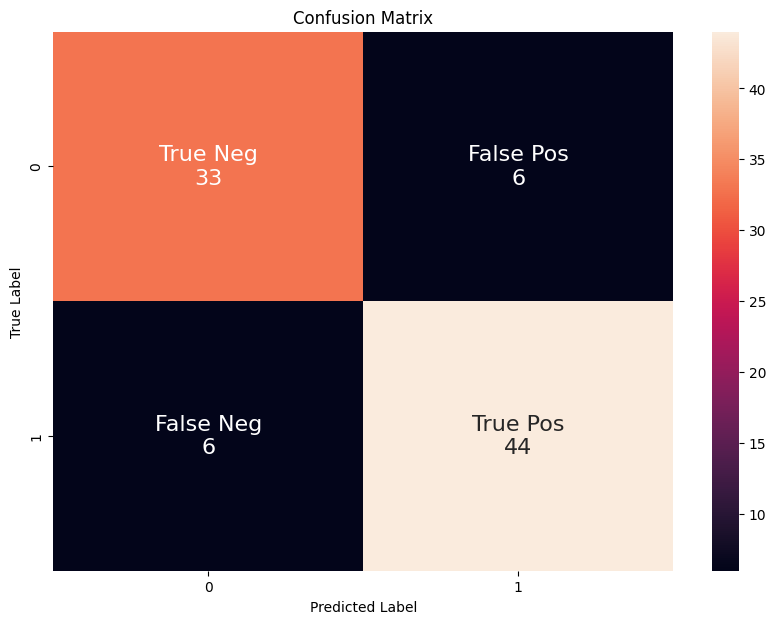

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(Y_test,knn_Y_pred)
fig = plt.figure(figsize=(10,7))


grp_name = ["True Neg","False Pos","False Neg","True Pos"]
grp_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(grp_name,grp_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt="")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)

decision_tree_Y_pred = decision_tree.predict(X_test)
# decision_tree.score(X_test,Y_test)
decision_tree_accuracy = accuracy_score(decision_tree_Y_pred,Y_test)
decision_tree_accuracy

0.7752808988764045

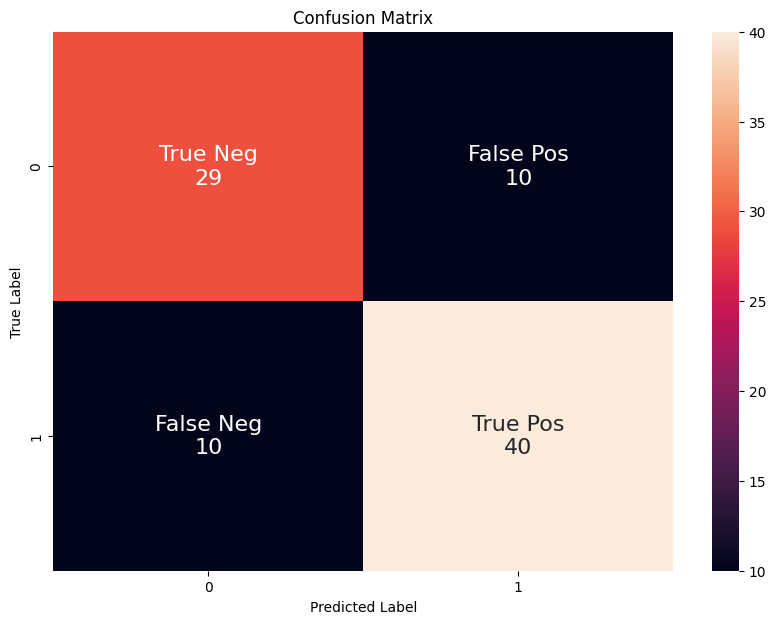

In [20]:
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

conf_mat = confusion_matrix(Y_test,decision_tree_Y_pred)
fig = plt.figure(figsize=(10,7))


grp_name = ["True Neg","False Pos","False Neg","True Pos"]
grp_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(grp_name,grp_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt="")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# SVM(Support Vector Machine)

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(X_train,Y_train)

svc_Y_pred = svc.predict(X_test)
# svc.score(X_test,Y_test)
svc_accuracy = accuracy_score(svc_Y_pred,Y_test)
svc_accuracy

0.8539325842696629

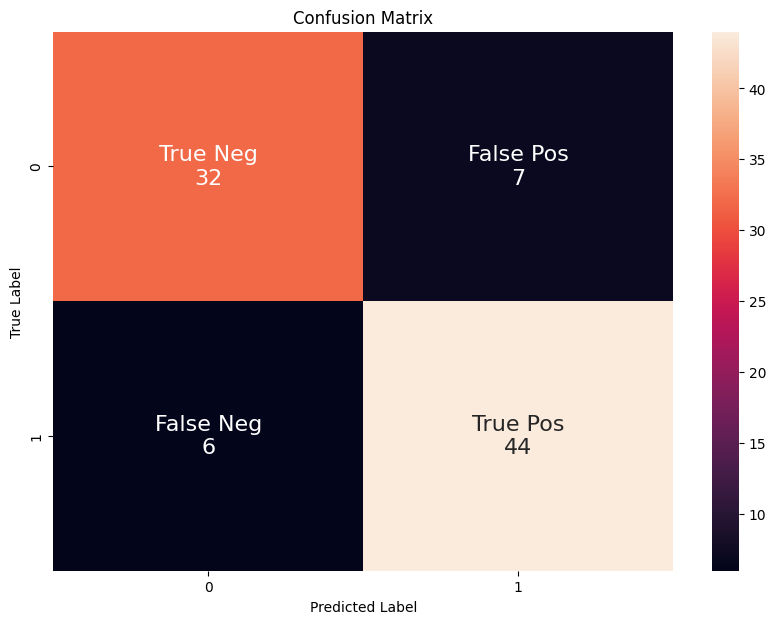

In [22]:
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

conf_mat = confusion_matrix(Y_test,svc_Y_pred)
fig = plt.figure(figsize=(10,7))


grp_name = ["True Neg","False Pos","False Neg","True Pos"]
grp_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(grp_name,grp_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt="")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train,Y_train)

random_forest_Y_pred = random_forest.predict(X_test)
# random_forest.score(X_test,Y_test)
random_forest_accuracy = accuracy_score(random_forest_Y_pred,Y_test)
random_forest_accuracy

0.8089887640449438

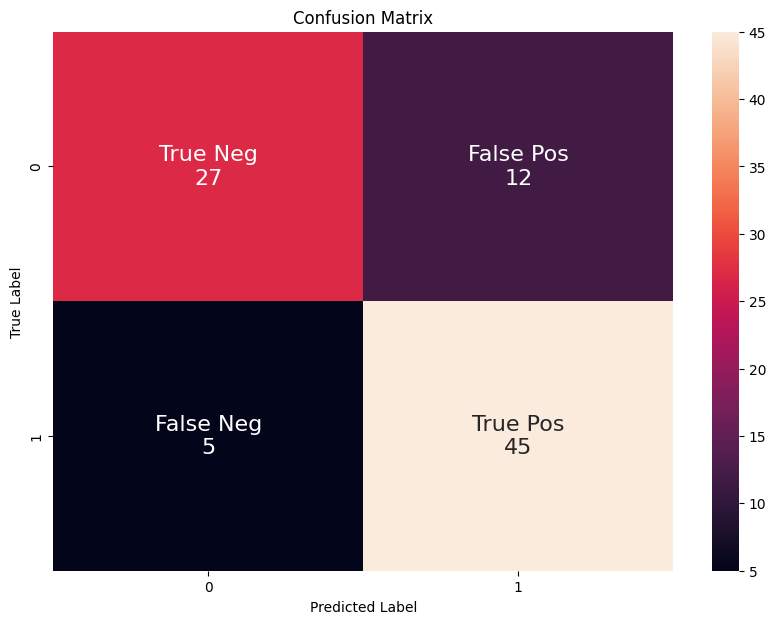

In [24]:
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

conf_mat = confusion_matrix(Y_test,random_forest_Y_pred)
fig = plt.figure(figsize=(10,7))


grp_name = ["True Neg","False Pos","False Neg","True Pos"]
grp_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(grp_name,grp_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt="")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Gaussian Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)

gaussian_Y_pred = gaussian.predict(X_test)
# gaussian.score(X_test,Y_test)
gaussian_accuracy = accuracy_score(gaussian_Y_pred,Y_test)
gaussian_accuracy

0.8202247191011236

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lg = LogisticRegression()
lg.fit(X_train,Y_train)

lg_Y_pred = lg.predict(X_test)
# gaussian.score(X_test,Y_test)
lg_accuracy = accuracy_score(lg_Y_pred,Y_test)
lg_accuracy

0.8539325842696629

# Single Input Prediction

In [27]:
print("Predicted Class :",random_forest.predict(X_test[25].reshape(1,-1))[0])
print("Actual Class :",Y_test.iloc[25])

Predicted Class : 1
Actual Class : 1


In [28]:
print("Predicted Class :",random_forest.predict(X_test[35].reshape(1,-1))[0])
print("Actual Class :",Y_test.iloc[35])

Predicted Class : 1
Actual Class : 1


# Predictive system

In [29]:
def prediction(sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p):
    data={"sl_no":[sl_no],
          "gender":[gender],
          "ssc_p":[ssc_p],
          "hsc_p":[hsc_p],
          "degree_p":[degree_p],
          "workex":[workex],
          "etest_p":[etest_p],
          "specialisation":[specialisation],
          "mba_p":[mba_p]}
    data=pd.DataFrame(data)

    data["gender"]=data["gender"].map({"M":0,"F":1})
    data["workex"]=data["workex"].map({"No":0,"Yes":1})
    data["specialisation"]=data["specialisation"].map({"Mkt&HR":0,"Mkt&Fin":1})

    scaled_df = scaler.transform(data)
    result=knn.predict(scaled_df).reshape(1,-1)
    return result[0]

    

In [30]:
sl_no=11
gender="F"
ssc_p=58.
hsc_p=61.
degree_p=60. 
workex="Yes"
etest_p=62.
specialisation="Mkt&Fin"
mba_p=60.85

result = prediction(sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p)
if result[0]:
    print("Placed")
else:
    print("Not Placed")

Placed


# Save Files

In [32]:
import pickle
pickle.dump(knn,open("Models/model.pkl","wb"))
pickle.dump(scaler,open("Models/scaler.pkl","wb"))